# Question 5

"Consider two functions 

$$ f_1(x,y) = (x − 2)^2 + (y − 3)^2 $$
$$ f_2(x,y) = [1 − (y − 3)]^2 + 20[(x + 3) − (y − 3)^2]^2 $$

Starting with $(x, y) = (0, 0)$ run the gradient descent algorithm for each function. Run for T iterations, and report the function value at the end of each step. (a) First, run with a fixed learning rate of s = 0.5. (b) Second, run with any variant of gradient descent you want (search the literature and document your choice by describing it). Try to get the smallest function value after T steps. For the function f1 you are allowed only T = 10 steps. For the function f2 you are allowed T = 100 steps."

In [1]:
import numpy as np
import tensorflow as tf
from IPython.display import Image
from matplotlib import pyplot as plt

First, we'll define the functions and respective gradients for the functions:

In [2]:
def f1(s):
    ''' f1 function defined in the writeup '''
    x = s[0]; y = s[1]
    return ((x - 2)**2 + (y - 3)**2)

def nabla_f1(s):
    ''' Returns gradient of f1 evaluated at (x, y) '''
    x = s[0]; y = s[1]
    return np.array([2 * x - 4, 2 * y - 6])

def f2(s):
    ''' f2 function defined in the writeup '''
    x = s[0]; y = s[1]
    return ((1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2) ** 2)

def nabla_f2(s):
    ''' Returns gradient of f2 evaluated at (x, y) '''
    x = s[0]; y = s[1]
    return np.array([40 * ((x + 3) - (y - 3) ** 2), \
            -2 * (1 - (y - 3)) + (-2 * (y - 3)) * 40 * ((x + 3) - (y - 3) ** 2)])

## Gradient Descent Implementation
Now I have my own implementation of gradient descent. This function implements vanilla gradient descent for the minimization of multidimensional functions. We run the algorithm for $T$ iterations, updating $x_k$ with the following rule:

$$x_{k+1} = x_k - \gamma \nabla f(x_k)$$

Where $x_k$ is the value of $x$ at the previous iteration, $\gamma$ is the learning rate for the optimization, and $\nabla f(x_k)$ is the gradient of the cost function we are minimizing evaluated at $x_k$. Therefore, the algorithm moves opposite to the direction of the gradient at $x_k$.

In [3]:
def run_grad_descent(x_0, s, f_prime, T = 10):
    '''
    Runs gradient descent until number of iterations is greater than given T value
    - Returns convergence path as list
    - Final value (i.e. min) is convergence_path[-1]

    Arguments:
    ----------
    x_0: 1 x M matrix
        - M = [x1, x2, x3, ....]
        - Starting point for the algorithm
    s: float
        - Learning rate for the algorithm
    f_prime: function with one argument
        - Argument must be 1 x M matrix
        - Gradient of the function we're minimizing
    T: int
        - Number of iterations allowed

    Returns:
    --------
    convergence_path: list
        - List of the points computed at each step of the algorithm
    '''
    x_k = x_0

    convergence_path = [x_k]

    for i in range(0, T):

        # Numpy performs element-wise subtraction and scalar multiplication
        x_k1 = np.subtract(x_k, (s * f_prime(x_k)))
        print(x_k1)
        convergence_path.append(x_k1)
        
        x_k = x_k1

    return convergence_path

Now we'll run the algorithm for our defined functions:

In [4]:
x_0 = np.array([0, 0])
cpath1 = run_grad_descent(x_0 = x_0, s = 0.5, f_prime = nabla_f1)   
print(f1(cpath1[-1]))

x_0 = np.array([0, 0])
cpath2 = run_grad_descent(x_0 = x_0, s = 0.5, f_prime = nabla_f2)   
print(f2(cpath2[-1]))

[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
[2. 3.]
0.0
[120. 724.]
[ 1.03944800e+07 -1.49886671e+10]
[4.49320284e+21 1.34694243e+32]
[ 3.62850784e+65 -9.77478235e+97]
[1.91092740e+197 3.73577989e+295]
[ inf -inf]
[nan nan]
[nan nan]
[nan nan]
[nan nan]
nan


<ipython-input-2-7ec9196a8616>:19: RuntimeWarning: overflow encountered in double_scalars
  return np.array([40 * ((x + 3) - (y - 3) ** 2), \
<ipython-input-2-7ec9196a8616>:20: RuntimeWarning: overflow encountered in double_scalars
  -2 * (1 - (y - 3)) + (-2 * (y - 3)) * 40 * ((x + 3) - (y - 3) ** 2)])
<ipython-input-2-7ec9196a8616>:19: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([40 * ((x + 3) - (y - 3) ** 2), \
<ipython-input-2-7ec9196a8616>:20: RuntimeWarning: invalid value encountered in double_scalars
  -2 * (1 - (y - 3)) + (-2 * (y - 3)) * 40 * ((x + 3) - (y - 3) ** 2)])


We can see that the $f_1$ function converged in one step, but $f_2$ diverged, going to $(\infty, -\infty)$. This divergence is most likely due to the sensitivity of gradient descent with this learning rate; this will be explored later.

Let's visualize these functions so that we can get some intuition as to why this happened:

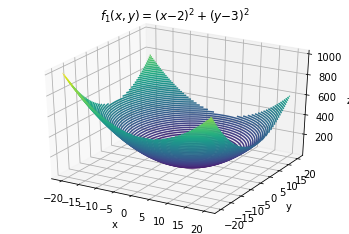

In [5]:
x_vals = np.linspace(-20, 20, 50)
y_vals = np.linspace(-20, 20, 50)
X, Y = np.meshgrid(x_vals, y_vals)
X_rav = X.ravel(); Y_rav = Y.ravel()
Z = np.array([f1([X_rav[i], Y_rav[i]]) for i in range(0, len(X_rav))])
Z = Z.reshape(X.shape)

ax = plt.axes(projection = '3d')
ax.contour(X, Y, Z, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title("$f_1(x,y) = (x − 2)^2 + (y − 3)^2$")
plt.show()

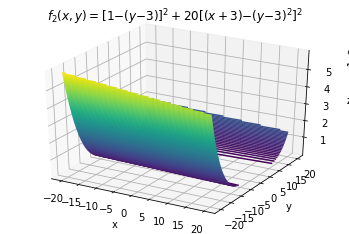

In [6]:
Z = np.array([f2([X_rav[i], Y_rav[i]]) for i in range(0, len(X_rav))])
Z = Z.reshape(X.shape)

ax = plt.axes(projection = '3d')
ax.contour(X, Y, Z, 100)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title("$f_2(x,y) = [1 − (y − 3)]^2 + 20[(x + 3) − (y − 3)^2]^2$")
plt.show()

The subtle patterns in these functions cannot be visualized well from the Jupyter Notebook, but they reveal that while $f_1$ shows a clear minimum at (2, 3), $f_2$ To visualize this better, I have shown the two images below: 

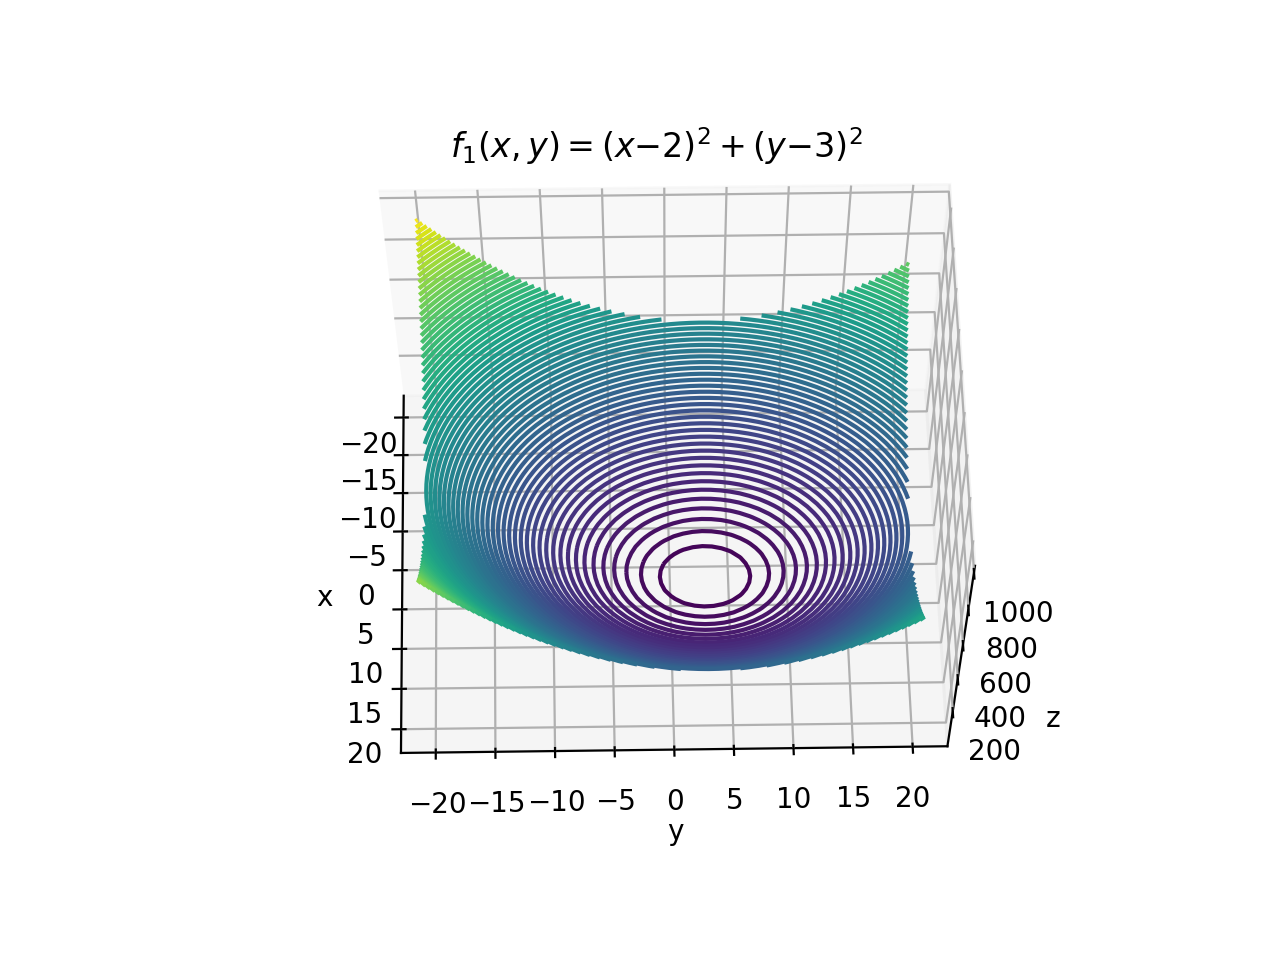

In [7]:
Image(filename='f1.png')  

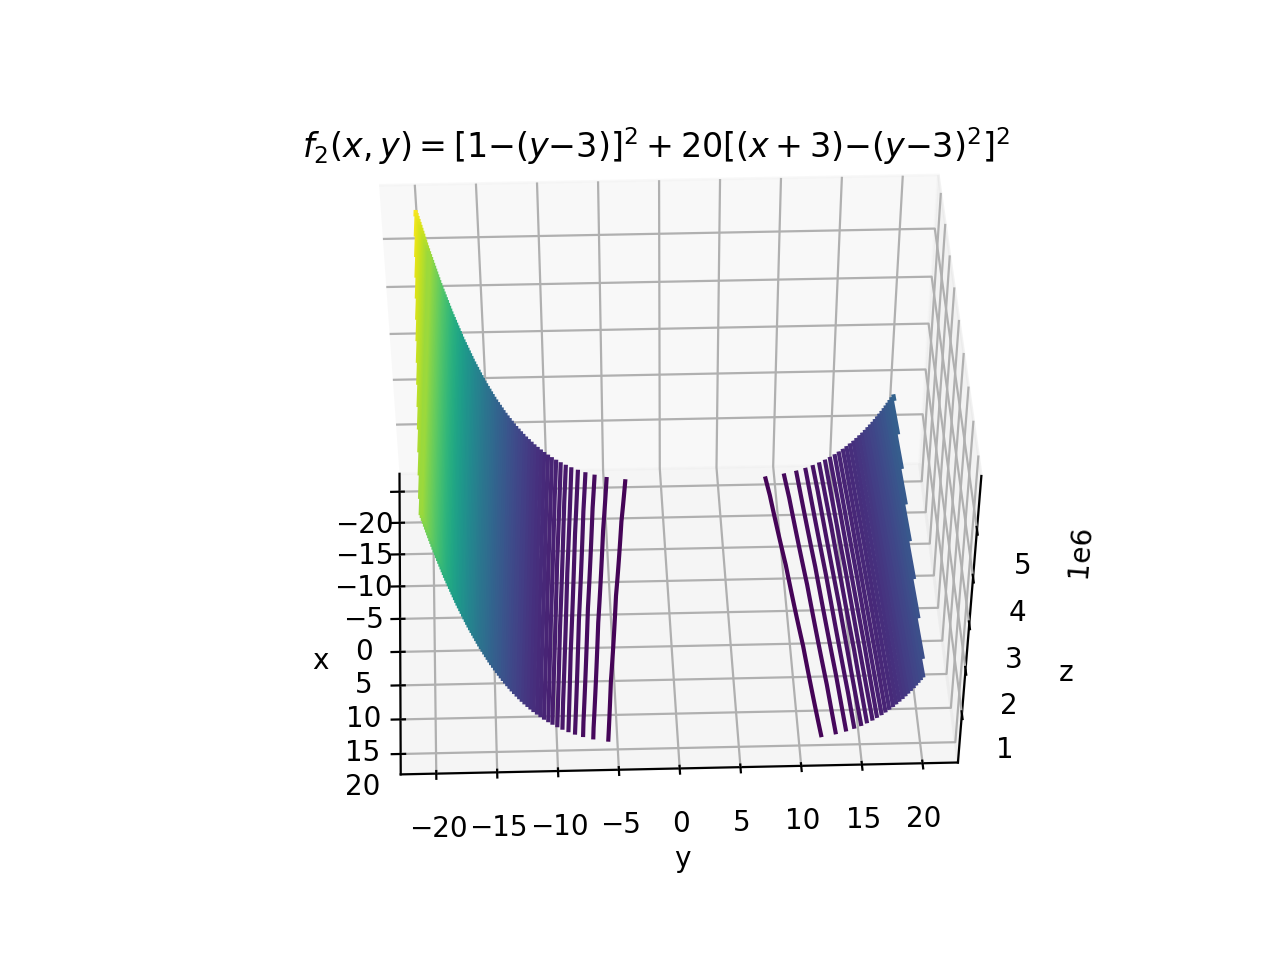

In [8]:
Image(filename='f2.png')

## Gradient Descent Variations

For $f_1$, I decided to stick to stochastic gradient descent (SGD), a popular optimization technique used in deep learning. In the context of data, SGD updates parameters based on computed weights for one sample instead of an entire batch of samples. However, in the context of function minimization, SGD works just like vanilla gradient descent, but this result is desirable because vanilla gradient descent worked perfectly for $f_1$. Therefore, we get an identical result with SGD:

In [9]:
sgd = tf.keras.optimizers.SGD(learning_rate = 0.5)

x = tf.Variable(0.0)
y = tf.Variable(0.0)

f1_loss = lambda : ((x - 2)**2 + (y - 3)**2)

# Version of the lambda function that can be evaluated with parameters
f1_loss_eval = lambda x, y: ((x - 2)**2 + (y - 3)**2)

i = 0
x_old = x.numpy()
y_old = y.numpy()

while (abs(f1_loss() - f1_loss_eval(x = x_old, y = y_old)) > 1.0e-8  \
        or i == 0):
    x_old = x.numpy()
    y_old = y.numpy()
    step_count = sgd.minimize(f1_loss, [x, y]).numpy()
    i += 1
    if (i >= 10):
        break

print("Number of steps: ", step_count)
print("Computed minimum = ({}, {})".format(x.numpy(), y.numpy()))
print("Gradient at Minimum = {}".format(nabla_f1([x.numpy(), y.numpy()])))

Number of steps:  2
Computed minimum = (2.0, 3.0)
Gradient at Minimum = [0. 0.]


### RMSProp

For $f_2$, which initially diverged with vanilla gradient descent, we need to try a different method. Upon surveying the literature, I decided to try the "RMSprop" algorithm, which is short for "root mean squared propagation". 

This algorithm attempts to dampen the oscillations usually observed when using gradient descent. Another undesirable feature of vanilla gradient descent is the fixed learning rate; sometimes it benefits us to adjust the learning rate in order to avoid divergence of our optimization algorithm. This is where RMSprop makes an improvement. RMSprop updates the learning rate based on the squared average of previously-computed gradients, thereby decreasing the learning rate if the previous gradients have been large or increasing it if the previous gradients have been small. RMSprop works exactly like gradient descent, but it updates the learning rate based on the gradients it previously computed to make this a more robust algorithm.

In the below code block, I apply TensorFlow's version of this algorithm to $f_2$:

In [10]:
sgd = tf.keras.optimizers.RMSprop(learning_rate = 0.75)

x = tf.Variable(0.0)
y = tf.Variable(0.0)

f2_loss = lambda : ((1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2) ** 2)
# Version of the lambda function that can be evaluated with parameters
f2_loss_eval = lambda x, y: ((1 - (y - 3))**2 + 20 * ((x + 3) - (y - 3)**2) ** 2)

i = 0
x_old = x.numpy()
y_old = y.numpy()

while (abs(f2_loss().numpy() - f2_loss_eval(x = x_old, y = y_old)) > 0.00000001  \
        or i == 0):
    x_old = x.numpy()
    y_old = y.numpy()
    #print(x_old, y_old)
    step_count = sgd.minimize(f2_loss, [x, y]).numpy()
    i += 1
    #print(x.numpy(), y.numpy())
    #print(abs(f2_loss().numpy() - f2_loss_eval(x = x_old, y = y_old)))
    
    if (i > 100):
        break

print("Number of steps: ", step_count)
print("Minimum = ({}, {})".format(x.numpy(), y.numpy()))
print("Gradient at Minimum = {}".format(nabla_f2([x.numpy(), y.numpy()])))

Number of steps:  101
Minimum = (-2.2974562644958496, 3.8395345211029053)
Gradient at Minimum = [-0.09097906 -0.16817083]


As we can see from the above results, the calculated minimum has a gradient that is very close to $<0, 0>$, so this value is fairly close to the local minimum of this function in the neighborhood of the point $(0, 0)$. This is a stark difference from the vanilla gradient descent which diverged when starting at $(0, 0)$ on $f_2$.